# <font face="algerian">Bike_   Sharing_   Model_   using_   M.L.R_   by _  Vivek  _ Kumar</font>



In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd

# Importing and Understanding Data

<h3>Reading the data from file(day.csv)</h3>

In [2]:
bikedata = pd.read_csv("day.csv")

In [3]:
bikedata.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Checking number of rows

In [4]:
bikedata.shape

(730, 16)

### Checking nulls in the given dataset

In [5]:
bikedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
bikedata.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


# Exploratory Data Analysis

### Visualising co-relation between numerical variables

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

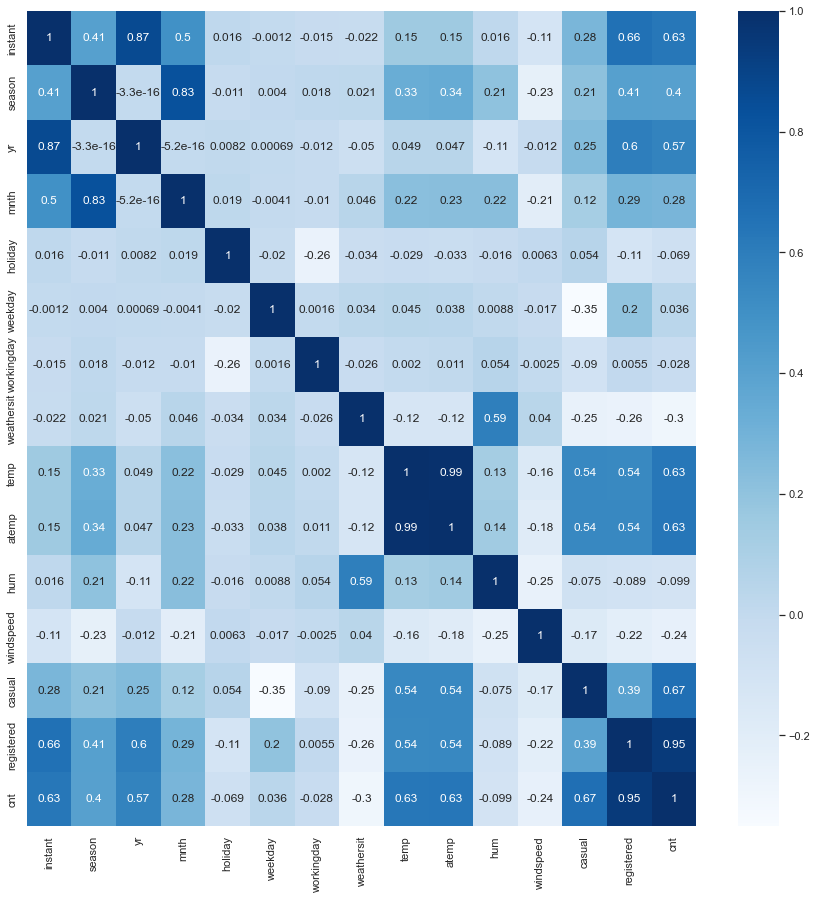

In [8]:
sns.set(font_scale=1.0)
plt.subplots(figsize=(15,15))
sns.heatmap(bikedata.corr(),annot=bikedata.corr(),cmap="Blues")
plt.show()

### Separating numerical features and placing them in <code>bikedata_2</code>

In [9]:
bikedata_2 = bikedata[['season', 'yr', 'mnth', 'holiday', 'weekday','workingday', 'weathersit', 'temp', 'atemp', 'hum'
               , 'windspeed', 'cnt']]
bikedata_2.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [10]:
bikedata_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


### Mapping proper names for better visibilty
1. <b>season : </b> (1:spring, 2:summer, 3:fall, 4:winter)
2. <b>yr : </b>year (0: 2018, 1:2019)
3. <b>mnth : </b>month ( 1 to 12)
4. <b>weekday : </b>day of the week
5. <b>workingday : </b>if day is neither weekend nor holiday is 1, otherwise is 0.
6. <b>weathersit :</b> 
             1: Clear, Few clouds, Partly cloudy, Partly cloudy
             2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
             3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
             4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
7. <b>holiday : </b>weather day is a holiday or not

In [11]:
bikedata_2['season'] = bikedata_2['season'].map({1:'spring',2:'summer',3:'fall',4:'winter'})
bikedata_2['yr'] = bikedata_2['yr'].map({0:'2018',1:'2019'})
bikedata_2['mnth'] = bikedata_2['mnth'].map({1:'Jan',2:'Feb',3:'Mar',4:'April',5:'May',6:'June',7:'July',8:'Aug',
                                       9:'Sept',10:'Oct',11:'Nov',12:'Dec'})
bikedata_2['weekday'] = bikedata_2['weekday'].map({0:'Mon',1:'Tues',2:'Wed',3:'Thurs',4:'Fri',5:'Sat',6:'Sun'})
bikedata_2['workingday'] = bikedata_2['workingday'].map({0:'No',1:'Yes'})
bikedata_2['weathersit'] = bikedata_2['weathersit'].map({1:"Good/Clear",2:'Moderate/Misty',3:'Bad/LightRain',
                                                         4:'Worse/HeavyRain'})
bikedata_2['holiday'] = bikedata_2['holiday'].map({0:'No',1:'Yes'})

bikedata_2.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,2018,Jan,No,Tues,Yes,Moderate/Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,2018,Jan,No,Wed,Yes,Moderate/Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,2018,Jan,No,Thurs,Yes,Good/Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,2018,Jan,No,Fri,Yes,Good/Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,2018,Jan,No,Sat,Yes,Good/Clear,9.305237,11.46350,43.6957,12.522300,1600


## Visualisation using pairplot for insights

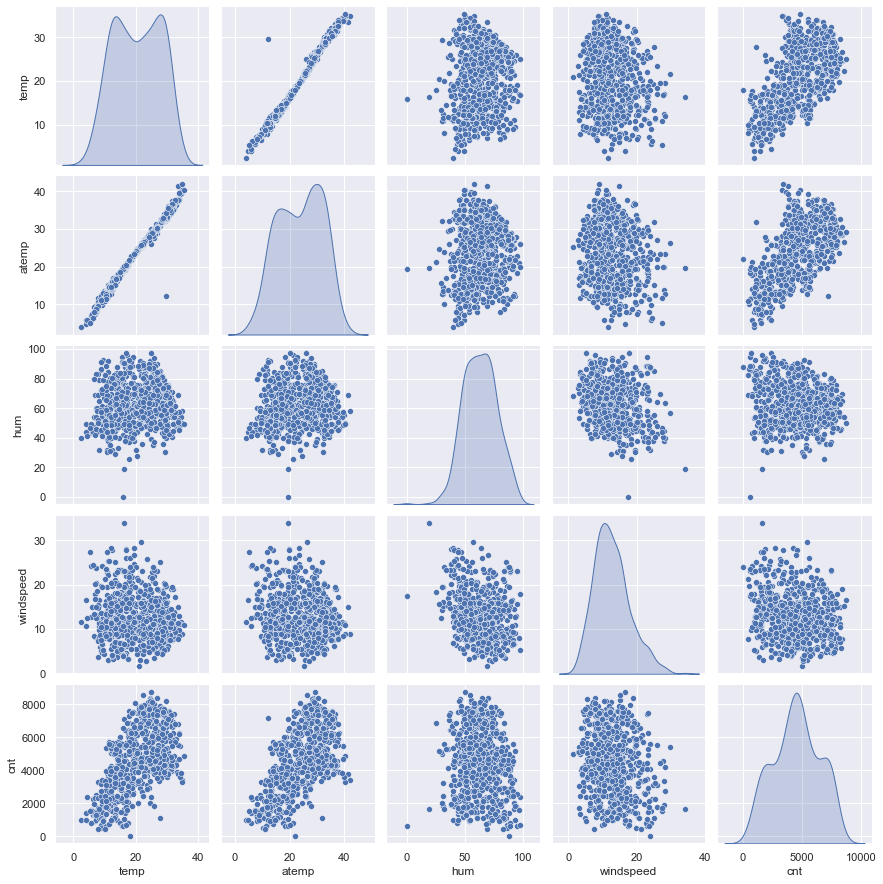

In [12]:
sns.pairplot(bikedata_2[['temp','atemp','hum','windspeed','cnt']],diag_kind='kde')
plt.show()

### Insights
1. <b>mnth VS cnt: </b>Count is >5000 in month of may, june, july, august, september, october
2. <b>season VS cnt: </b>Count is the most during fall
3. <b>yr VS cnt: </b>Count has increased exponentialy in the year 2019 W.R.T. 2018
4. <b>holiday VS cnt: </b>Count increases during holidays
5. <b>workingday VS cnt: </b>Count increases during non-working days 
6. <b>weathersit VS cnt: </b>Count is the most during when weather is Clear, Few clouds, Partly cloudy, Partly cloudy
7. <b>weekday VS cnt: </b>Count is the least on tuesday, wednesday and thursday

## Visualisation using barplot for insights

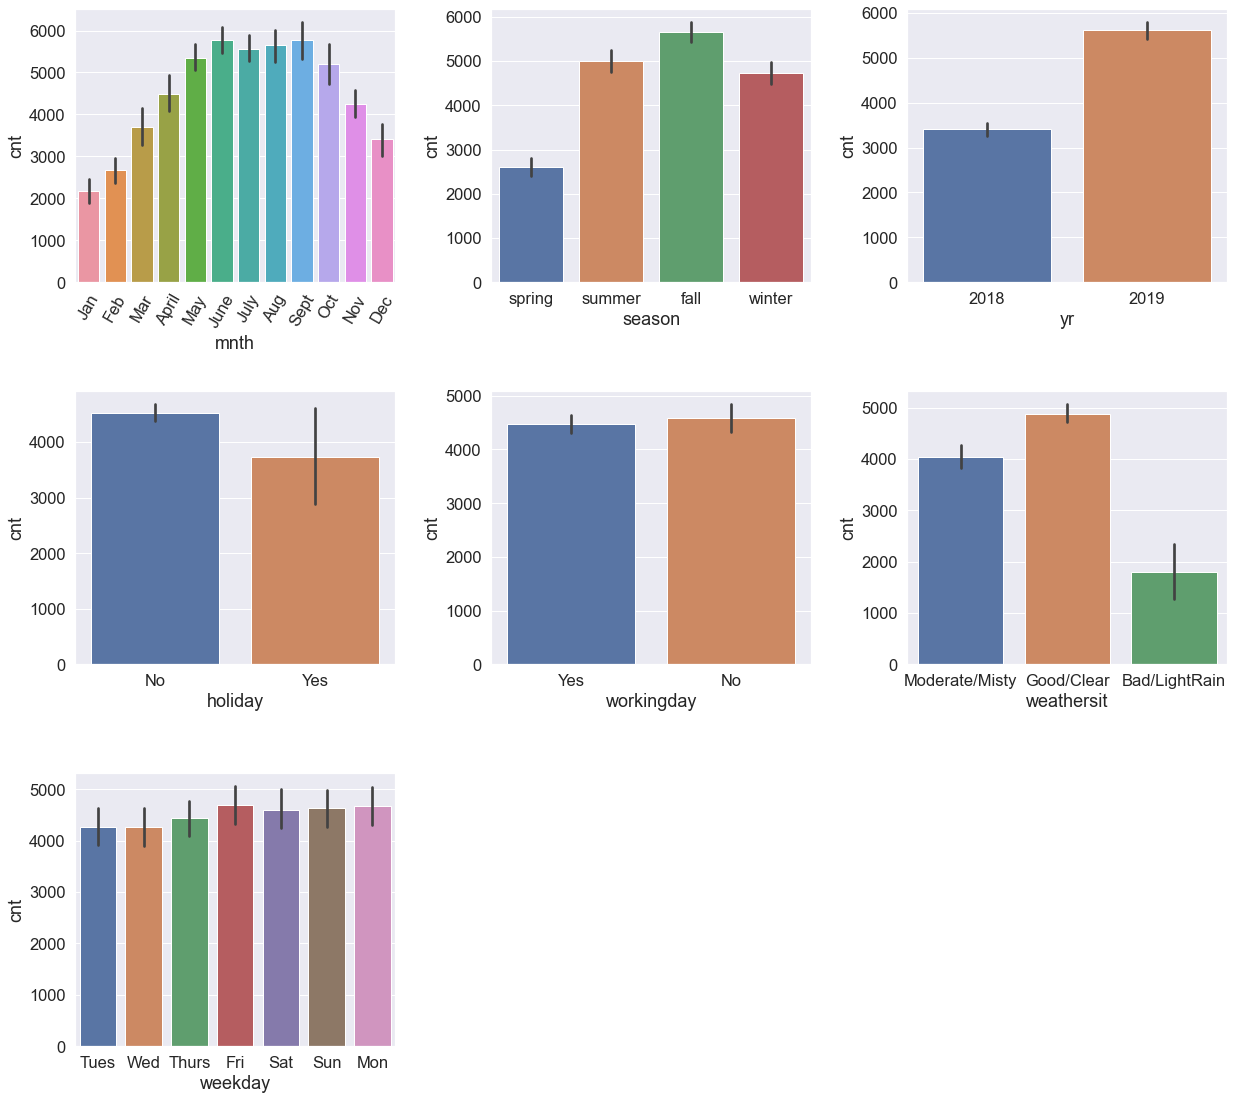

In [13]:
sns.set(font_scale=1.5)
plt.figure(figsize=(20, 18))
categorical_cols = ["mnth","season","yr","holiday","workingday","weathersit","weekday"]
for i in range(0,7):
    plt.subplot(3,3,i+1)
    if i==0: #rotation only reqd for month vs count 
        plt.xticks(rotation=60)
    sns.barplot(x= categorical_cols[i], y= "cnt", data=bikedata_2)
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.3, hspace=0.4)